# Question 1

Dataset Description:
I have a dataset that covers the top 50 songs across 73 countries, updated daily. It includes song title, artist, daily rank, country, and other attributes like release date and album details.

Target Variable Analysis:
I'm focusing on daily rank. This will allow me to see each song's change daily in popularity and help me decide which one is dominate in all 73 countries.

Prediction Goal:
I want to be able to predict the top song in all 73 countries based on the data I have.

# Question 2

In [1]:
import pandas as pd

df = pd.read_csv('universal_top_spotify_songs.csv', nrows=500)

columns_to_drop = ['spotify_id', 'daily_movement', 'weekly_movement', 'album_name', 'time_signature', 'name', 'country', 'snapshot_date']
df.drop(columns=columns_to_drop, inplace=True)

print(df.head())

            artists  daily_rank  popularity  is_explicit  duration_ms  \
0  Jung Kook, Latto           1          97         True       184400   
1    iñigo quintero           2          98        False       184061   
2        Tate McRae           3          99         True       131872   
3   Bad Bunny, Feid           4          95         True       162767   
4         Bad Bunny           5          96         True       267194   

  album_release_date  danceability  energy  key  loudness  mode  speechiness  \
0         2023-07-14         0.802   0.832   11    -4.107     1       0.0434   
1         2022-09-23         0.537   0.421    5    -8.720     1       0.0285   
2         2023-09-15         0.750   0.733    6    -3.180     0       0.0319   
3         2023-10-13         0.911   0.778    5    -2.248     1       0.2620   
4         2023-10-13         0.787   0.621    4    -5.009     0       0.0680   

   acousticness  instrumentalness  liveness  valence    tempo  
0        0.3110 

In [2]:
df = df.sample(n=500, random_state=1).reset_index(drop=True)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

print(df.isnull().sum())

artists               0
daily_rank            0
popularity            0
is_explicit           0
duration_ms           0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
dtype: int64


In [3]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
duplicates_dropped = initial_rows - df.shape[0]
print(f"Dropped {duplicates_dropped} duplicate rows.")

df = pd.get_dummies(df, drop_first=True)


Dropped 7 duplicate rows.


In [4]:
def check_and_transform_categorical(df):
    object_cols = df.select_dtypes(include=['object']).columns
    if object_cols.empty:
        print("No columns of type 'object' found.")
    else:
        for column in object_cols:
            unique_values = df[column].unique()
            print(f"In column '{column}', unique values are: {unique_values}")
    
    df_transformed = pd.get_dummies(df, drop_first=True)
    
    return df_transformed

df = check_and_transform_categorical(df)


No columns of type 'object' found.


DataFrame columns: Index(['daily_rank', 'popularity', 'is_explicit', 'duration_ms',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       ...
       'album_release_date_2023-10-14', 'album_release_date_2023-10-15',
       'album_release_date_2023-10-16', 'album_release_date_2023-10-17',
       'album_release_date_2023-10-18', 'album_release_date_2023-10-19',
       'album_release_date_2023-10-20', 'album_release_date_2023-10-23',
       'album_release_date_2023-10-24', 'album_release_date_2023-10-25'],
      dtype='object', length=551)
Numeric columns: Index(['daily_rank', 'popularity', 'duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')


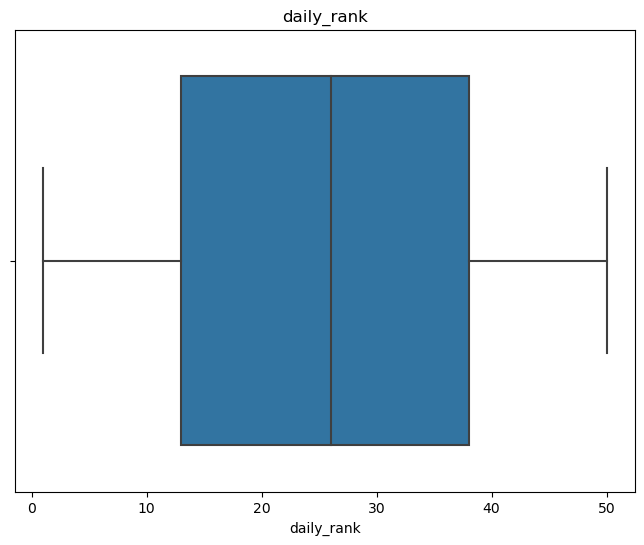

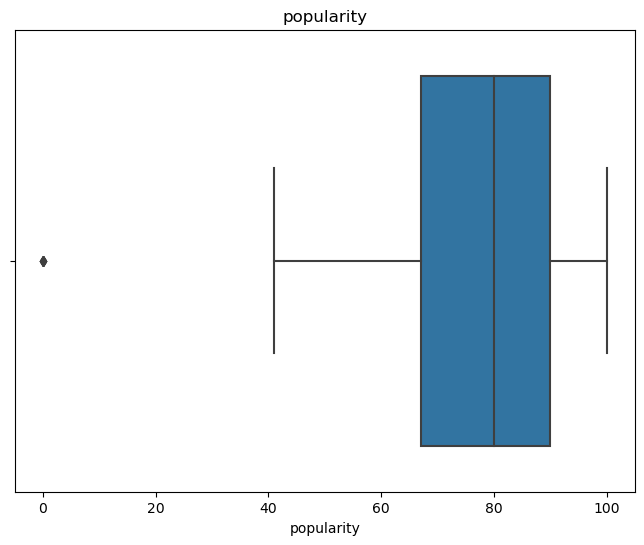

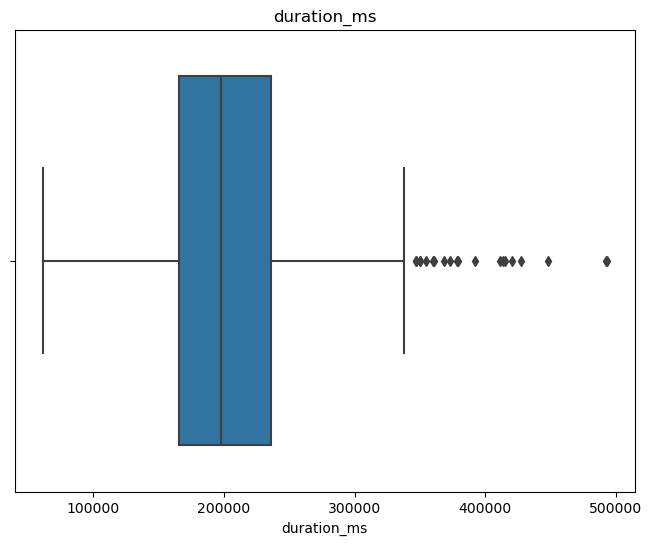

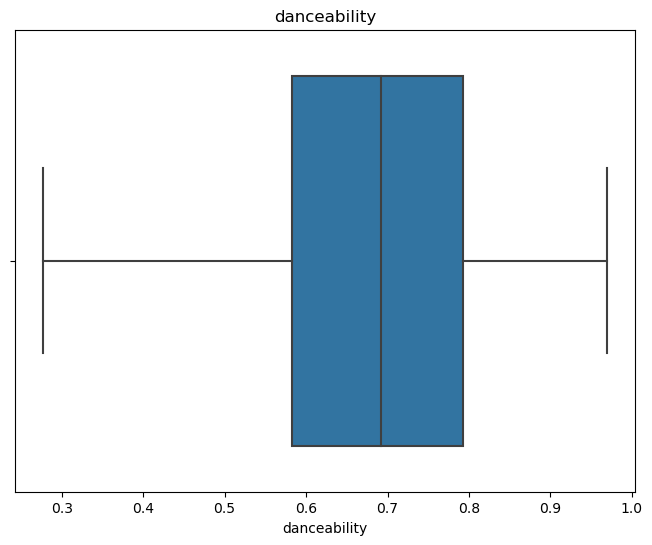

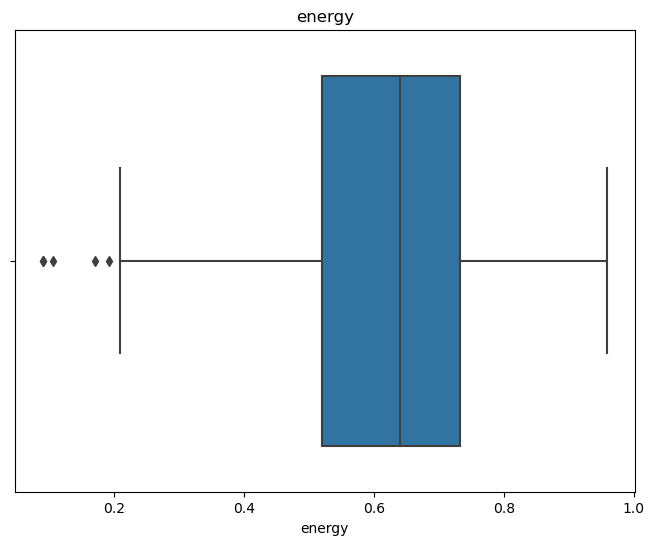

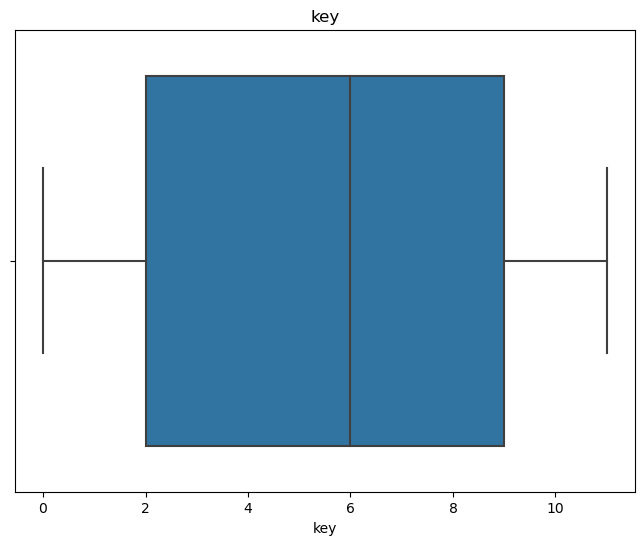

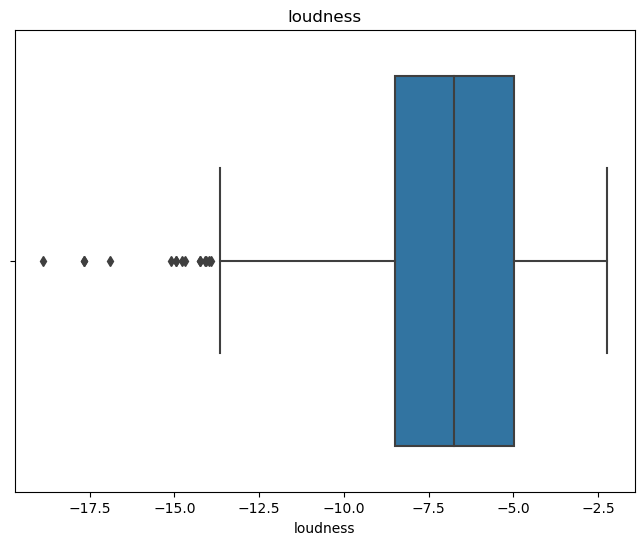

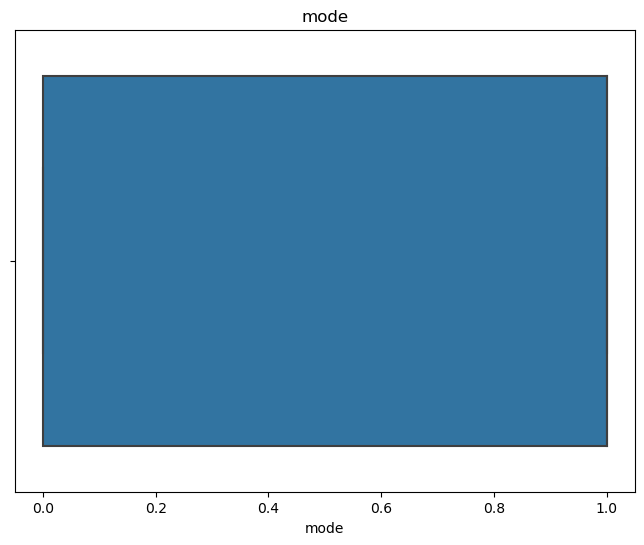

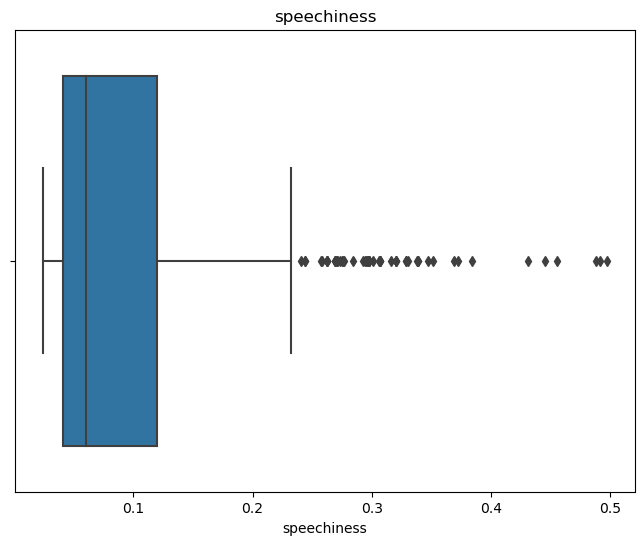

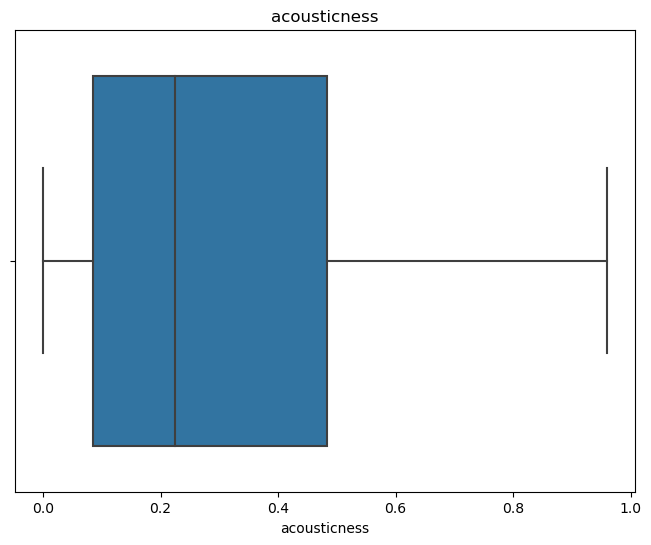

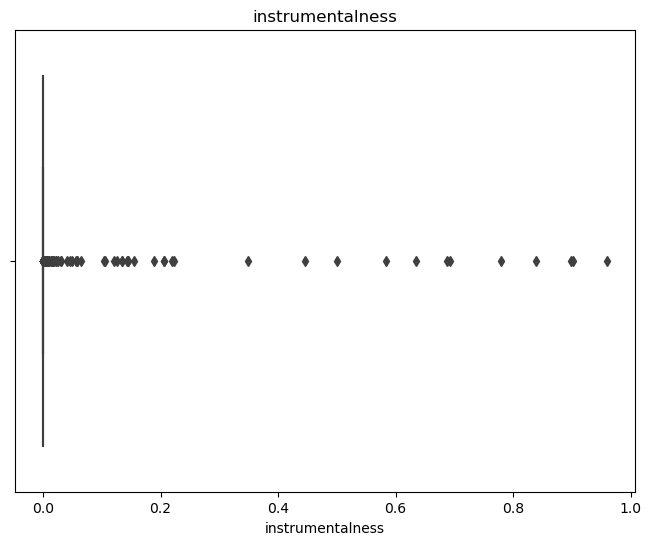

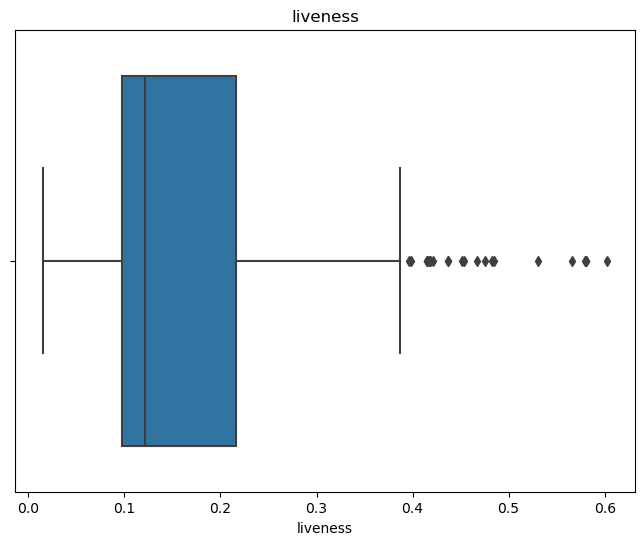

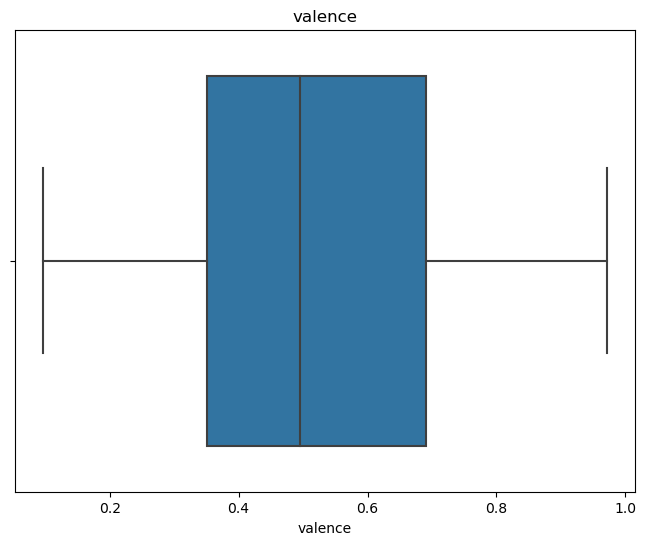

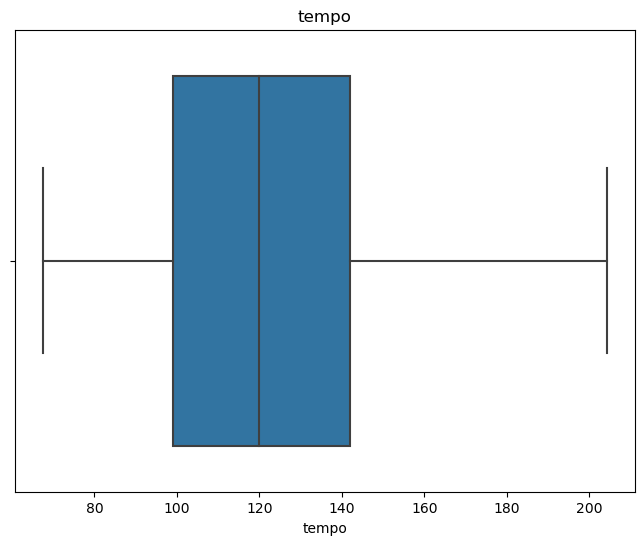

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print("DataFrame columns:", df.columns)

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

print("Numeric columns:", numeric_columns)

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df.loc[:, column]) 
    plt.title(column)
    plt.show()


In [6]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

outliers_removed = {} 

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    outliers_removed[column] = outliers
    
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column, outlier_df in outliers_removed.items():
    if not outlier_df.empty:
        print(f"Outliers removed for {column}:")
        display(outlier_df)

Outliers removed for popularity:


,daily_rank,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,album_release_date_2023-10-14,album_release_date_2023-10-15,album_release_date_2023-10-16,album_release_date_2023-10-17,album_release_date_2023-10-18,album_release_date_2023-10-19,album_release_date_2023-10-20,album_release_date_2023-10-23,album_release_date_2023-10-24,album_release_date_2023-10-25
9,41,0,False,306366,0.792,0.485,8,-10.135,1,0.0672,...,0,0,0,0,0,0,0,0,0,0
24,16,0,False,288052,0.703,0.442,11,-13.981,1,0.0480,...,0,0,0,0,0,0,0,0,0,0
302,14,0,False,420229,0.809,0.695,10,-11.967,0,0.0505,...,0,0,0,0,0,0,0,0,0,0
344,27,0,False,162061,0.796,0.752,9,-4.434,0,0.1880,...,0,0,0,0,0,0,0,0,0,1
405,38,0,False,372976,0.794,0.673,10,-10.784,1,0.0450,...,0,0,0,0,0,0,0,0,0,0


Outliers removed for duration_ms:


,daily_rank,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,album_release_date_2023-10-14,album_release_date_2023-10-15,album_release_date_2023-10-16,album_release_date_2023-10-17,album_release_date_2023-10-18,album_release_date_2023-10-19,album_release_date_2023-10-20,album_release_date_2023-10-23,album_release_date_2023-10-24,album_release_date_2023-10-25
66,40,65,False,349773,0.692,0.453,9,-7.131,1,0.0299,...,0,0,0,0,0,0,0,0,0,0
103,9,60,False,347148,0.869,0.549,10,-11.258,0,0.0650,...,0,0,0,0,0,0,0,0,0,0
115,31,89,True,379058,0.529,0.711,11,-5.016,0,0.0669,...,0,0,0,0,0,0,0,0,0,0
167,33,61,False,368640,0.822,0.534,1,-9.491,1,0.0585,...,0,0,0,0,0,0,0,0,0,0
177,20,64,False,360920,0.821,0.450,1,-10.660,1,0.0764,...,0,0,0,0,0,0,0,0,0,0
217,2,70,False,447834,0.861,0.524,6,-13.325,0,0.0667,...,0,0,0,0,0,0,0,0,0,0
231,21,61,False,347245,0.874,0.405,11,-11.942,1,0.0568,...,0,0,0,0,0,0,0,0,0,0
267,4,49,False,413838,0.822,0.571,1,-11.215,0,0.0527,...,0,0,0,0,0,0,0,0,0,0
273,9,89,True,354784,0.619,0.619,2,-6.238,1,0.4910,...,0,0,0,0,0,0,0,0,0,0
310,20,89,False,338000,0.813,0.682,0,-3.598,1,0.0402,...,0,0,0,0,0,0,0,0,0,0


Outliers removed for energy:


,daily_rank,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,album_release_date_2023-10-14,album_release_date_2023-10-15,album_release_date_2023-10-16,album_release_date_2023-10-17,album_release_date_2023-10-18,album_release_date_2023-10-19,album_release_date_2023-10-20,album_release_date_2023-10-23,album_release_date_2023-10-24,album_release_date_2023-10-25
17,40,96,False,222369,0.444,0.0911,0,-17.665,1,0.0307,...,0,0,0,0,0,0,0,0,0,0
19,47,65,False,278732,0.638,0.1060,3,-15.103,1,0.0424,...,0,0,0,0,0,0,0,0,0,0
170,28,96,False,222369,0.444,0.0911,0,-17.665,1,0.0307,...,0,0,0,0,0,0,0,0,0,0
380,26,54,False,244062,0.549,0.1710,11,-14.778,1,0.0566,...,0,0,0,0,0,0,0,0,0,0
421,16,90,False,228013,0.369,0.1920,4,-12.151,0,0.0400,...,0,0,0,0,0,0,0,0,0,0


Outliers removed for loudness:


,daily_rank,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,album_release_date_2023-10-14,album_release_date_2023-10-15,album_release_date_2023-10-16,album_release_date_2023-10-17,album_release_date_2023-10-18,album_release_date_2023-10-19,album_release_date_2023-10-20,album_release_date_2023-10-23,album_release_date_2023-10-24,album_release_date_2023-10-25
13,17,66,False,331377,0.813,0.399,0,-18.875,1,0.0826,...,0,0,0,0,0,0,0,0,0,0
91,31,69,False,246818,0.562,0.325,7,-13.669,1,0.0314,...,0,0,0,0,0,0,0,0,0,0
227,1,82,False,230161,0.657,0.372,4,-14.110,0,0.0476,...,0,0,0,0,0,0,0,0,0,0
258,29,65,False,120111,0.769,0.310,9,-14.249,0,0.3720,...,0,0,0,0,0,0,0,0,0,0
276,14,41,False,175545,0.758,0.246,7,-16.913,1,0.1700,...,0,0,0,0,0,0,0,0,0,1
284,9,96,False,137773,0.504,0.308,9,-14.958,1,0.0321,...,0,0,0,0,0,0,0,0,0,0
386,40,76,False,172010,0.363,0.435,5,-13.529,0,0.0315,...,0,0,0,0,0,0,0,0,0,0
475,3,96,False,137773,0.504,0.308,9,-14.958,1,0.0321,...,0,0,0,0,0,0,0,0,0,0
489,45,61,False,224175,0.678,0.482,2,-14.073,1,0.1440,...,0,0,0,0,0,0,0,0,0,0


Outliers removed for speechiness:


,daily_rank,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,album_release_date_2023-10-14,album_release_date_2023-10-15,album_release_date_2023-10-16,album_release_date_2023-10-17,album_release_date_2023-10-18,album_release_date_2023-10-19,album_release_date_2023-10-20,album_release_date_2023-10-23,album_release_date_2023-10-24,album_release_date_2023-10-25
3,18,94,True,260111,0.663,0.670,8,-8.399,1,0.271,...,0,0,0,0,0,0,0,0,0,0
26,35,92,True,247444,0.470,0.640,2,-7.779,1,0.320,...,0,0,0,0,0,0,0,0,0,0
27,43,53,True,141230,0.840,0.439,2,-13.112,0,0.275,...,0,0,0,0,0,0,0,0,0,0
34,46,59,False,148192,0.826,0.400,9,-12.597,0,0.316,...,0,0,0,0,0,0,0,0,0,0
36,28,93,True,216327,0.847,0.724,1,-5.410,1,0.298,...,0,0,0,0,0,0,0,0,0,0
41,31,72,True,154305,0.614,0.455,4,-10.389,0,0.293,...,0,0,0,0,0,0,0,0,0,0
50,15,91,False,132294,0.801,0.517,2,-8.205,0,0.269,...,0,0,0,0,0,0,0,0,0,0
51,15,94,True,172797,0.841,0.738,7,-7.455,0,0.307,...,0,0,0,0,0,0,0,0,0,0
71,25,88,True,116104,0.613,0.810,1,-6.160,1,0.488,...,0,0,0,0,0,0,0,0,0,0
78,1,94,True,260111,0.663,0.670,8,-8.399,1,0.271,...,0,0,0,0,0,0,0,0,0,0


Outliers removed for instrumentalness:


,daily_rank,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,album_release_date_2023-10-14,album_release_date_2023-10-15,album_release_date_2023-10-16,album_release_date_2023-10-17,album_release_date_2023-10-18,album_release_date_2023-10-19,album_release_date_2023-10-20,album_release_date_2023-10-23,album_release_date_2023-10-24,album_release_date_2023-10-25
0,5,70,False,123789,0.631,0.581,10,-10.370,0,0.1390,...,0,0,0,0,0,0,0,0,0,0
7,32,92,False,153946,0.644,0.735,8,-5.747,1,0.0391,...,0,0,0,0,0,0,0,0,0,0
16,35,75,False,196800,0.473,0.839,1,-7.837,0,0.0399,...,0,0,0,0,0,0,0,0,0,0
21,13,95,False,212953,0.508,0.430,2,-9.475,0,0.0335,...,0,0,0,0,0,0,0,0,0,0
23,43,63,False,240008,0.631,0.822,5,-4.793,1,0.0269,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,14,87,True,147874,0.730,0.785,8,-6.512,1,0.0554,...,0,0,0,0,0,0,0,0,0,0
463,8,98,False,172964,0.628,0.523,11,-8.307,0,0.0946,...,0,0,0,0,0,0,0,0,0,0
469,16,96,True,267194,0.787,0.621,4,-5.009,0,0.0680,...,0,0,0,0,0,0,0,0,0,0
474,7,98,True,197920,0.708,0.737,1,-4.045,1,0.0436,...,0,0,0,0,0,0,0,0,0,0


Outliers removed for liveness:


,daily_rank,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,album_release_date_2023-10-14,album_release_date_2023-10-15,album_release_date_2023-10-16,album_release_date_2023-10-17,album_release_date_2023-10-18,album_release_date_2023-10-19,album_release_date_2023-10-20,album_release_date_2023-10-23,album_release_date_2023-10-24,album_release_date_2023-10-25
6,11,61,False,176727,0.761,0.793,9,-4.578,0,0.0469,...,0,0,0,0,0,0,0,0,0,0
53,20,78,False,138817,0.356,0.535,9,-11.335,0,0.1070,...,0,0,0,0,0,0,0,0,0,0
106,30,65,False,257251,0.484,0.546,9,-6.793,1,0.0618,...,0,0,0,0,0,0,0,0,0,0
138,26,73,False,211733,0.457,0.941,10,-2.692,0,0.0917,...,0,0,0,0,0,0,0,0,0,0
149,24,95,True,212878,0.646,0.736,5,-7.118,0,0.0449,...,0,0,0,0,0,0,0,0,0,0
163,34,85,False,157477,0.732,0.839,9,-5.007,1,0.0345,...,0,0,0,0,0,0,0,0,0,0
216,12,67,True,226993,0.645,0.566,2,-12.294,1,0.1400,...,0,0,0,0,0,0,0,0,0,0
225,6,68,False,188108,0.844,0.677,6,-5.958,1,0.0564,...,0,0,0,0,0,0,0,0,0,0
255,32,67,False,268941,0.453,0.434,5,-6.854,0,0.0260,...,0,0,0,0,0,0,0,0,0,0
350,10,73,False,154298,0.724,0.905,8,-6.316,1,0.2320,...,0,0,0,0,0,0,0,0,0,0


Outliers removed for tempo:


,daily_rank,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,album_release_date_2023-10-14,album_release_date_2023-10-15,album_release_date_2023-10-16,album_release_date_2023-10-17,album_release_date_2023-10-18,album_release_date_2023-10-19,album_release_date_2023-10-20,album_release_date_2023-10-23,album_release_date_2023-10-24,album_release_date_2023-10-25
81,18,66,True,156303,0.598,0.489,11,-8.884,0,0.0486,...,0,0,0,0,0,0,0,0,0,0
165,12,87,True,163854,0.492,0.675,6,-5.456,1,0.0389,...,0,0,0,0,0,0,0,0,0,0


# Question 3

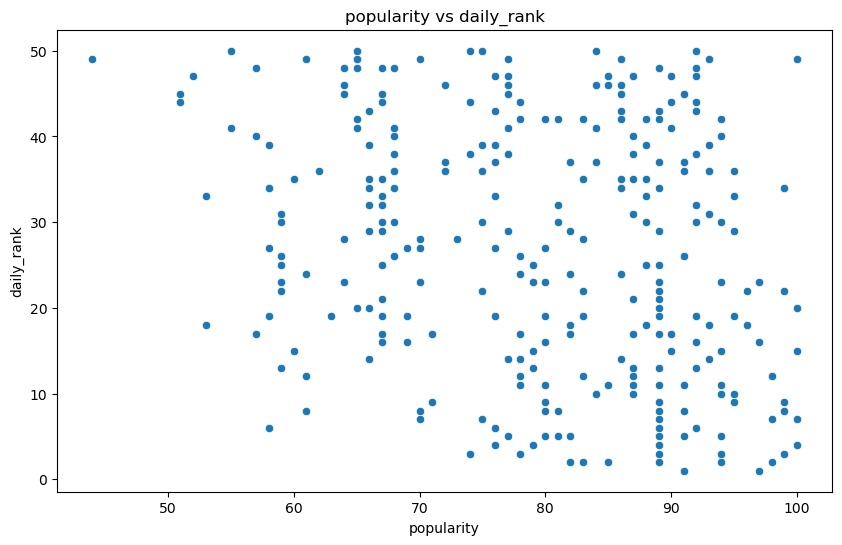

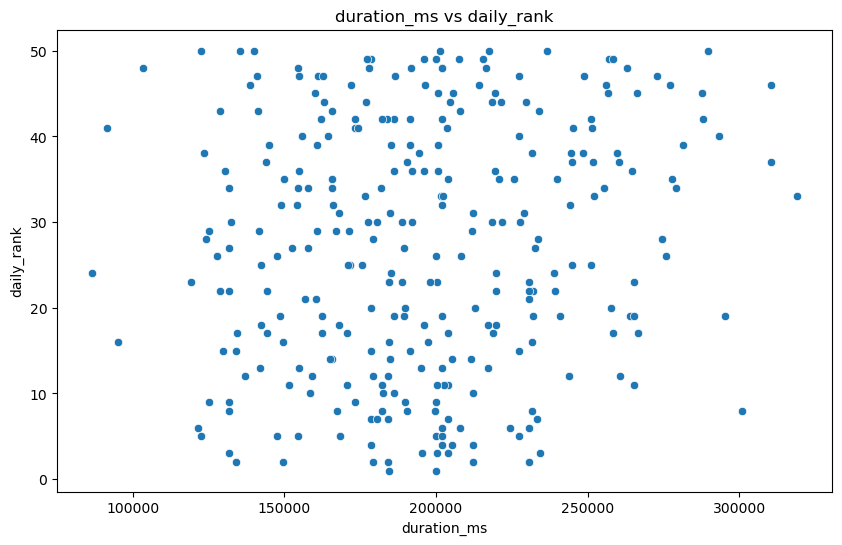

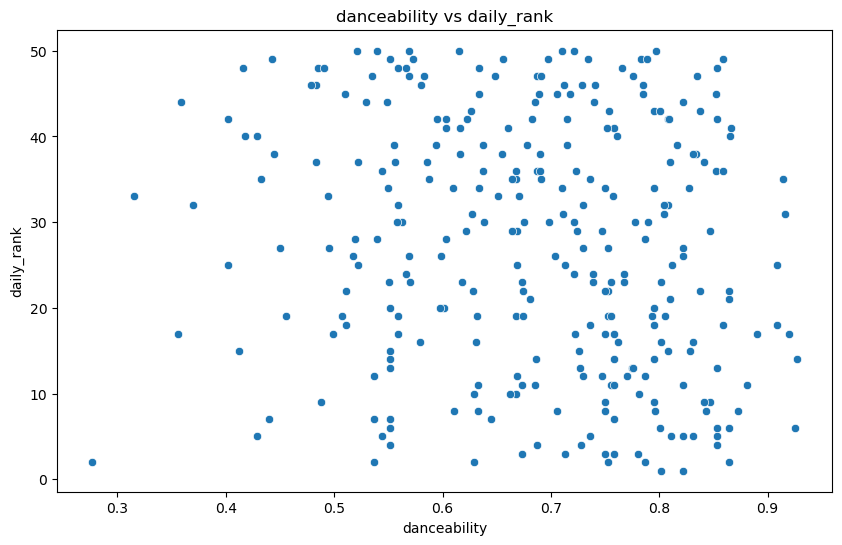

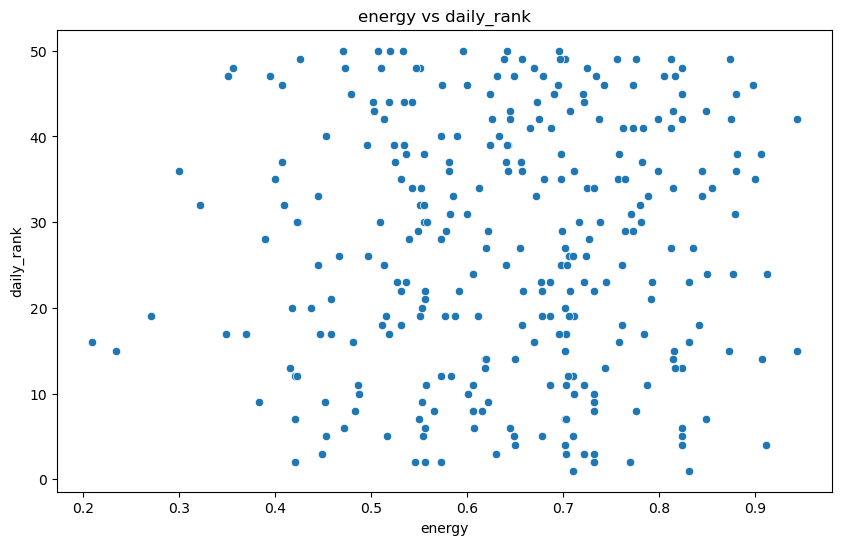

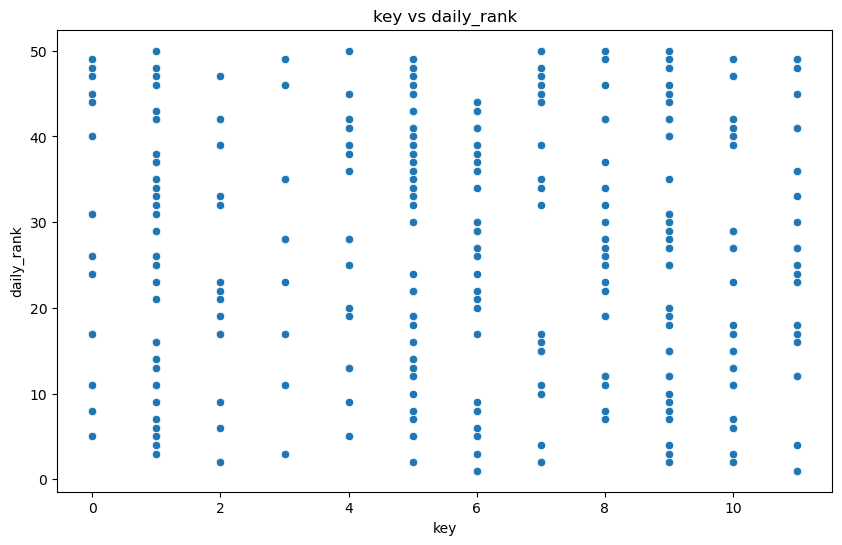

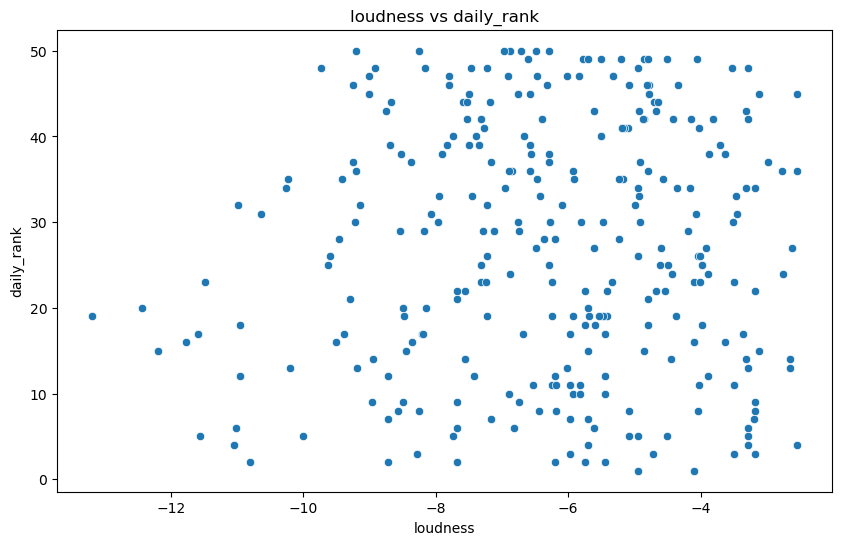

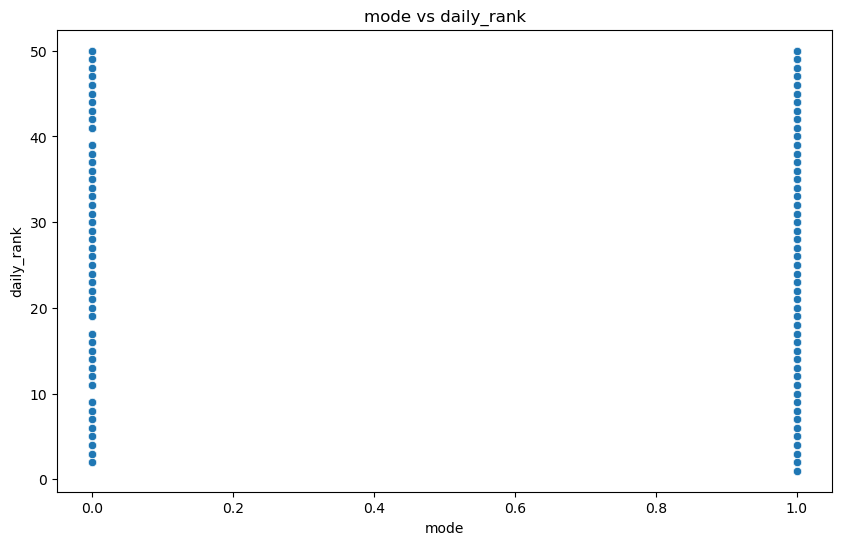

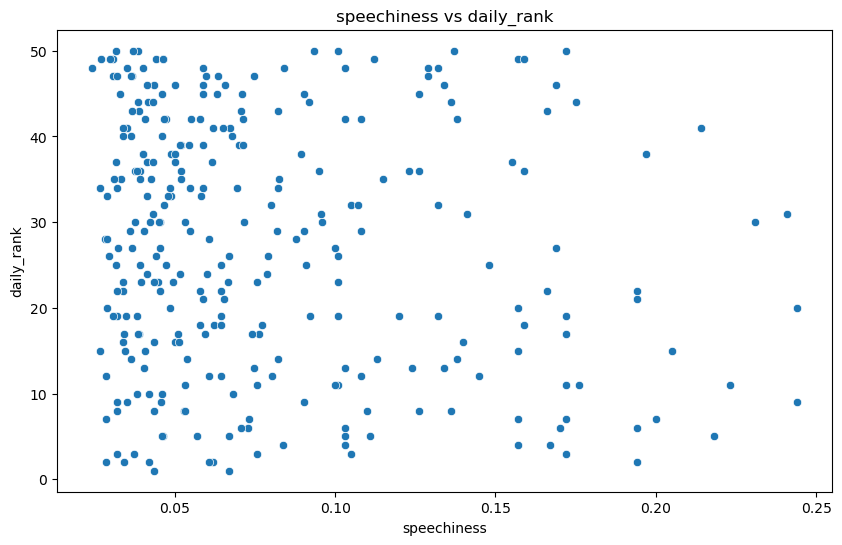

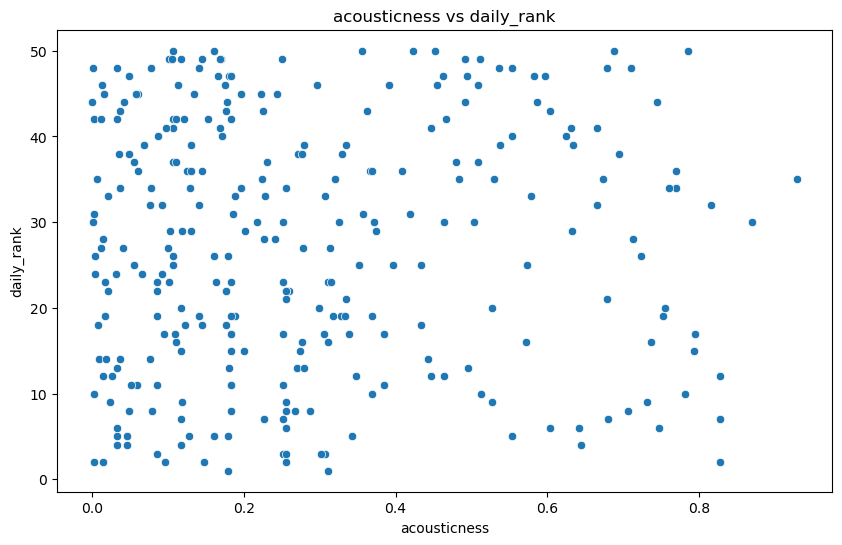

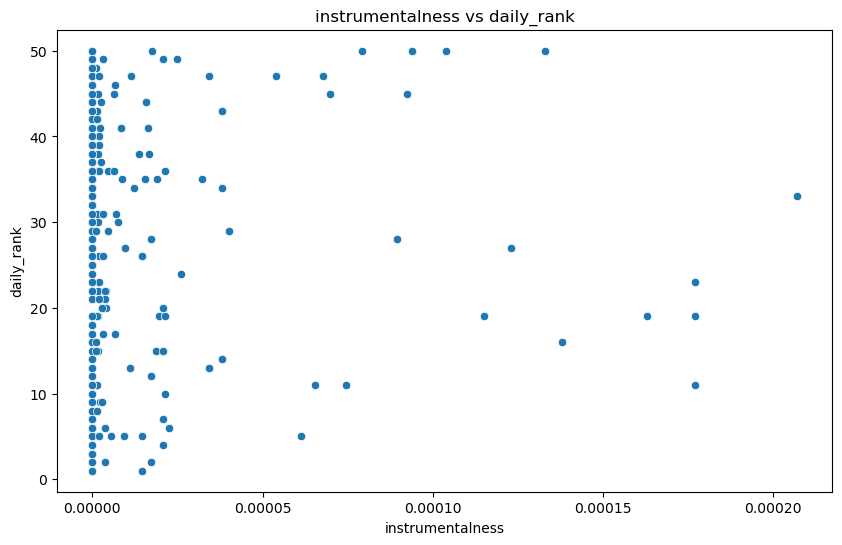

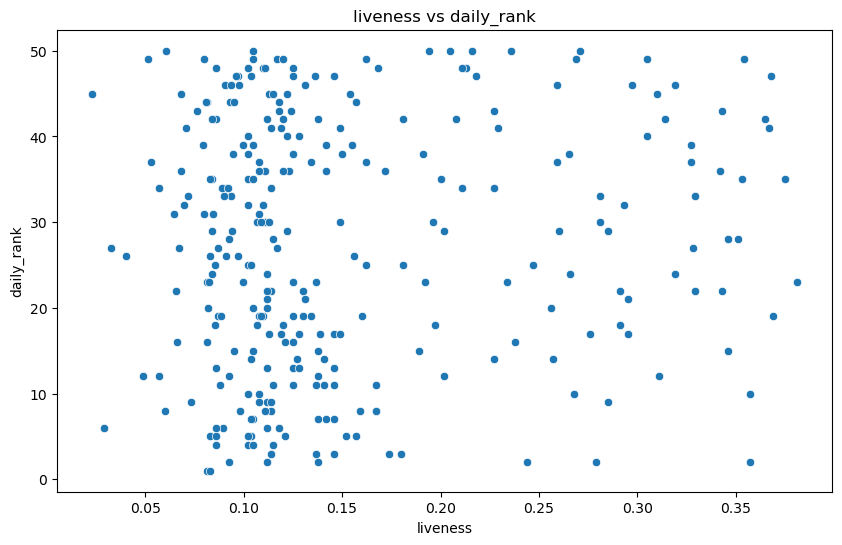

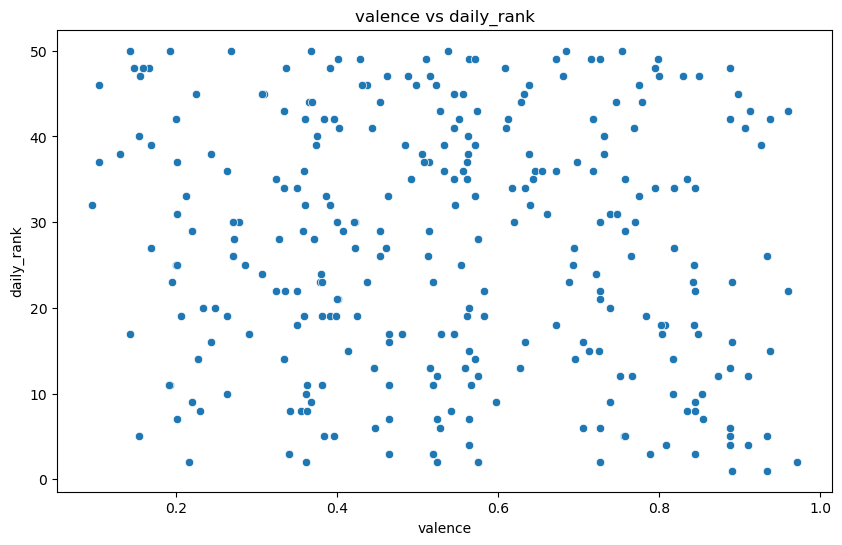

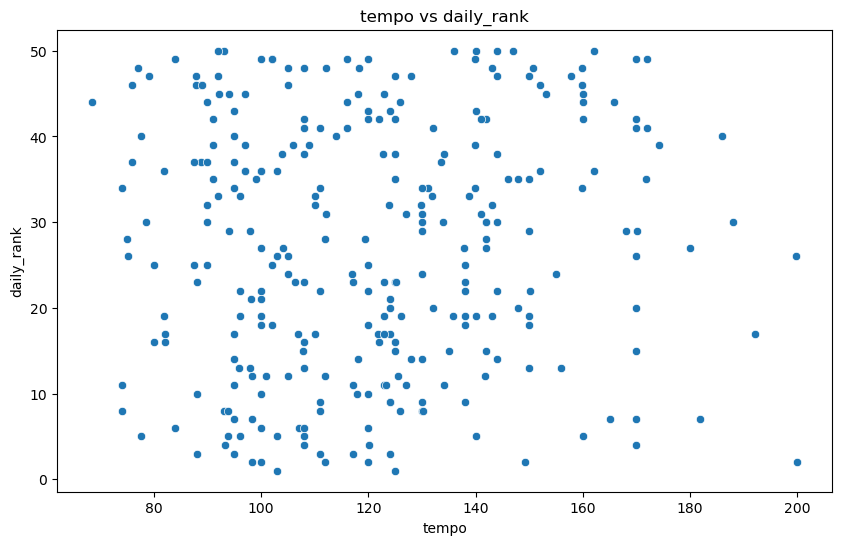

In [7]:
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='daily_rank', data=df)
    plt.title(f"{feature} vs daily_rank")
    plt.show()


In [8]:
!pip install statsmodels


In [9]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

original_df = pd.read_csv('universal_top_spotify_songs.csv', nrows=500)

results = {}

for column in original_df.columns:
    if column != "daily_rank" and original_df[column].dtype == "object" and len(original_df[column].unique()) > 2:
        formula = f"daily_rank ~ C({column})"
        model = ols(formula, data=original_df).fit()
        aov_table = sm.stats.anova_lm(model, typ=2)  
        results[column] = aov_table

for column, aov in results.items():
    print(f"\nANOVA results for variable: {column}\n")
    print(aov)



ANOVA results for variable: spotify_id

                     sum_sq     df         F   PR(>F)
C(spotify_id)  88720.916667  397.0  1.479789  0.00901
Residual       15404.083333  102.0       NaN      NaN

ANOVA results for variable: name

                sum_sq     df         F   PR(>F)
C(name)   88720.916667  397.0  1.479789  0.00901
Residual  15404.083333  102.0       NaN      NaN

ANOVA results for variable: artists

                 sum_sq     df         F   PR(>F)
C(artists)  74627.48254  336.0  1.227331  0.06925
Residual    29497.51746  163.0       NaN      NaN

ANOVA results for variable: country

                  sum_sq     df             F  PR(>F)
C(country)  1.661153e-24    8.0  9.771488e-28     1.0
Residual    9.371250e+04  441.0           NaN     NaN

ANOVA results for variable: album_name

                     sum_sq     df         F    PR(>F)
C(album_name)  73914.802997  337.0  1.176151  0.120779
Residual       30210.197003  162.0       NaN       NaN

ANOVA results for va

In [10]:
import pandas as pd
from scipy.stats import chi2_contingency

original_df = pd.read_csv('universal_top_spotify_songs.csv', nrows=500)

results_chi2 = {}

for column in original_df.columns:
    if column != "daily_rank" and original_df[column].dtype == "object" and len(original_df[column].unique()) > 2:
        contingency_table = pd.crosstab(original_df[column], original_df["daily_rank"])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        results_chi2[column] = {"Chi2 Value": chi2, "P-Value": p}

for column, chi2_result in results_chi2.items():
    print(f"\nChi-squared results for variable: {column}\n")
    print("Chi2 Value:", chi2_result["Chi2 Value"])
    print("P-Value:", chi2_result["P-Value"])



Chi-squared results for variable: spotify_id

Chi2 Value: 19611.66666666667
P-Value: 0.21023364685216187

Chi-squared results for variable: name

Chi2 Value: 19611.666666666668
P-Value: 0.21023364685216714

Chi-squared results for variable: artists

Chi2 Value: 16561.86507936508
P-Value: 0.29393495915721646

Chi-squared results for variable: country

Chi2 Value: 0.0
P-Value: 1.0

Chi-squared results for variable: album_name

Chi2 Value: 16614.318181818184
P-Value: 0.28772299505763305

Chi-squared results for variable: album_release_date

Chi2 Value: 9911.484409899045
P-Value: 0.21241351305783088


There's a few variables with little to no variance, which are spotify_id, name, album_name, and album_release_date

From the results:

country in ANOVA has a p-value of 1.0, suggesting it might not be a relevant predictor for daily_rank.
album_release_date in ANOVA has a relatively high p-value (0.405855), making it potentially less relevant in predicting daily_rank.
country in Chi-squared also has a p-value of 1.0, further supporting that it might not be relevant.

There seems to be no high-correlated features that are noticable immediately by my scatter plot graphs. 

It requires normalized data and there was some variables that needs to be changed to dummy variables.

# Question 4

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df.drop('daily_rank', axis=1) 
y = df['daily_rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Root Mean Squared Error: 14.479500680326478
R-squared: -0.04810636061731044


Yes, the data does need to be balanced and I did use train_test_split to vaidate the result. I used the Random Forest algorithm and for evaluating the prediction model I used the Root Mean Squared Error. 

It seems that my model failed and I believe the reason is because there were no relavant features that really helped get us down to determining the daily_rank.

# Question 5